In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
preds = pd.read_csv('/Users/renero/Documents/SideProjects/trader/output/pred_Gold_2009_2019_ohlc_20yw20.csv',
                    delimiter=',')
preds.head()

,actual,20yw20
0,520.50,531.818000
1,528.88,526.241875
2,538.76,555.376250
3,543.61,546.569250
4,528.66,536.433125


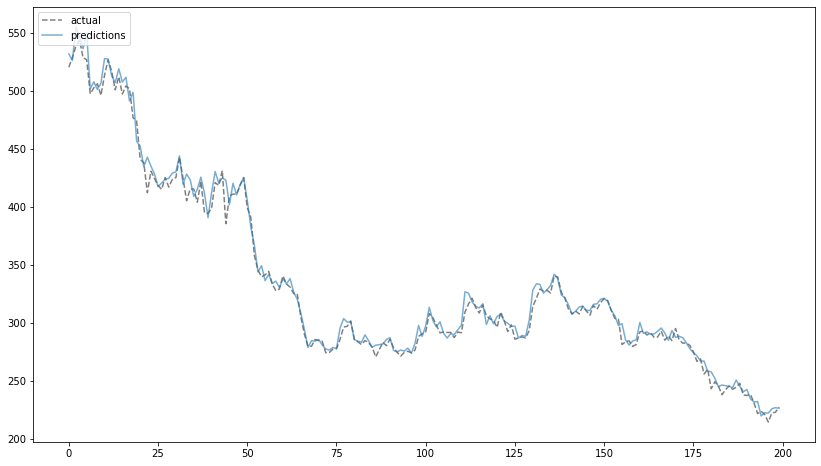

In [20]:
plt.figure(figsize=(14,8))
plt.plot(preds.actual.iloc[:200], 'k--', alpha=0.5, label='actual')
plt.plot(preds[preds.columns[1]].iloc[:200], alpha=0.6, label='predictions')
plt.legend(loc='upper left')
plt.show()

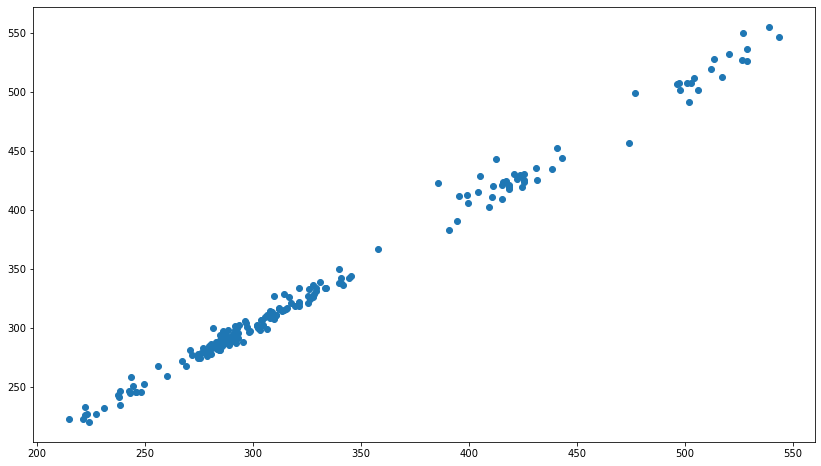

In [23]:
plt.figure(figsize=(14,8))
plt.scatter(preds.actual.iloc[:200], preds[preds.columns[1]].iloc[:200])
plt.show()